# Computer Vision in Action

Computer vision is a field of artificial intelligence that enables computers to interpret visual data from the world. One common task in computer vision is image classification, where the goal is to classify an image into one of several predefined categories. Image classification has improved greatly in the last decade due to the increase in the amount of labeled training data and processing speeds of GPUs.

We will use a pre-trained model to classify images from the CIFAR-10 dataset, which contains 60,000 32x32 (tiny!) color images in 10 different classes, such as airplanes, cars, and birds.


In [ ]:
# Import libraries
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Define the transformation to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


## Visualizing the Dataset

Let's visualize some images from the CIFAR-10 dataset.

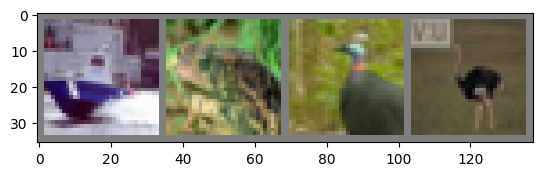

Actual:  ship  frog  bird  bird 


In [ ]:
# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Show random training images and their labels
dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print('Actual: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

## Using a Pre-trained Model

We'll use a pre-trained ResNet-18 model to classify the images. ResNet-18 is a popular convolutional neural network (CNN) architecture.

In [ ]:
# Load the pre-trained ResNet-18 model
model = models.resnet18(pretrained=True)
model.eval()

# Modify the final layer to output 10 classes (CIFAR-10)
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, 10)

# Load the model to the GPU if available
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


## Testing the Model

Let's test the model on some test images to see how well it performs.

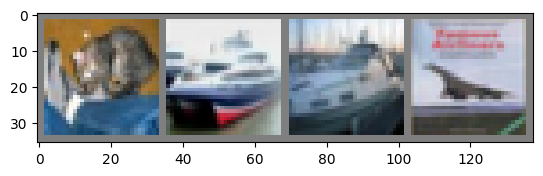

Predicted:  plane ship  plane plane
Actual:  cat   ship  ship  plane


In [ ]:
# Get some random test images
dataiter = iter(testloader)
images, labels = next(dataiter)

# Move the images to the device
images = images.to(device)

# Predict the classes of the test images
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Show images
imshow(torchvision.utils.make_grid(images.cpu()))
# Print predictions
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))
print('Actual: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [ ]:
## End of Script